In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


df = pd.read_csv('cleaned/cleaned_data.csv', sep=',')
df2 = pd.read_csv('data/set11_it3.csv', sep=',')


The first step we took was to check for any duplicates after loading the dataset. If any were present they were to be dropped and the number checked again

In [4]:
#check how many duploicates are in the dataset
duplicates = df2.duplicated().sum()
print(f"Number of duplicates in the dataset: {duplicates}")

Number of duplicates in the dataset: 23


In [5]:
#drop all duplicates
df2.drop_duplicates(inplace=True)
duplicates = df2.duplicated().sum()
print(f"Number of duplicates in the dataset: {duplicates}")

Number of duplicates in the dataset: 0


After making sure all duplicates were removed our next stop was to merge the new dataset with the cleaned version of the dataset from iteration 1 (the only two necessary datasets for this iteration)

In [6]:
#merge the two datasets
df_merged = pd.merge(df, df2, on='DI', how='inner')
df_merged.head(5)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DI                   2340 non-null   int64  
 1   TradeValue           2340 non-null   float64
 2   RealmType            2340 non-null   object 
 3   Enclave              2340 non-null   object 
 4   LivingQuarters       2340 non-null   float64
 5   ParcelSize           2340 non-null   float64
 6   ParcelSizeUnit       2340 non-null   object 
 7   StructuralIntegrity  2340 non-null   int64  
 8   ExteriorCharm        2340 non-null   object 
 9   Craftsmanship        2340 non-null   int64  
 10  EraConstructed       2340 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 219.4+ KB


Following that we checked to see if there were any null values in the newly merged dataset before proceedings

In [7]:
#check for null values in the merged dataset
null_values = df_merged.isnull().sum()
print("Null values in the merged dataset:")

Null values in the merged dataset:


Next we created our method for calculating if a dwelling needed restoration or not and added it to the newly merged dataset

In [8]:
# Step 1: Define the function that checks the two conditions
def calculate_needs_restoration(row):
    age_factor = 1 if row['EraConstructed'] < 1300 else 0 
    structure_factor = 1 if row['StructuralIntegrity'] <= 6 else 0
    total_factors = age_factor + structure_factor
    return True if total_factors == 2 else False  # only if both are met

# Step 2: Apply the function to your merged dataframe
df_merged['NeedsRestoration'] = df_merged.apply(calculate_needs_restoration, axis=1)

# Optional: save it if you want to reuse it
df_merged.to_csv("cleaned/restoration_ready_data.csv", index=False)


In [9]:
df_merged.head(5)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DI                   2340 non-null   int64  
 1   TradeValue           2340 non-null   float64
 2   RealmType            2340 non-null   object 
 3   Enclave              2340 non-null   object 
 4   LivingQuarters       2340 non-null   float64
 5   ParcelSize           2340 non-null   float64
 6   ParcelSizeUnit       2340 non-null   object 
 7   StructuralIntegrity  2340 non-null   int64  
 8   ExteriorCharm        2340 non-null   object 
 9   Craftsmanship        2340 non-null   int64  
 10  EraConstructed       2340 non-null   int64  
 11  NeedsRestoration     2340 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 221.7+ KB


Boxplot for comparison and findign possible relationships/trends

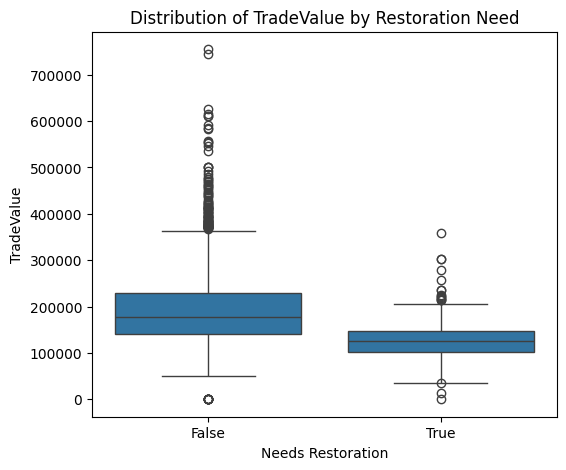

In [10]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(x='NeedsRestoration', y='TradeValue', data=df_merged)
plt.title("Distribution of TradeValue by Restoration Need")
plt.xlabel("Needs Restoration")
plt.ylabel("TradeValue")
plt.show()

The next step is to ensure all predictors were in the proper format for modeling 

In [11]:
categorical_cols = ['RealmType', 'Enclave', 'ParcelSizeUnit']
df_encoded = pd.get_dummies(df_merged, columns=categorical_cols, drop_first=True)
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DI                      2340 non-null   int64  
 1   TradeValue              2340 non-null   float64
 2   LivingQuarters          2340 non-null   float64
 3   ParcelSize              2340 non-null   float64
 4   StructuralIntegrity     2340 non-null   int64  
 5   ExteriorCharm           2340 non-null   object 
 6   Craftsmanship           2340 non-null   int64  
 7   EraConstructed          2340 non-null   int64  
 8   NeedsRestoration        2340 non-null   bool   
 9   RealmType_GnomeBurough  2340 non-null   uint8  
 10  RealmType_Meadowlands   2340 non-null   uint8  
 11  Enclave_Cloudrest       2340 non-null   uint8  
 12  Enclave_Crystalhollow   2340 non-null   uint8  
 13  Enclave_Dragonspire     2340 non-null   uint8  
 14  Enclave_Dreamweaver     2340 non-null   